<a href="https://colab.research.google.com/github/iamMchoi/Hello-Kit/blob/master/2_1_CNN_Dogs_Cats%20TensorBoard%20Save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TensorBoard, Mounting Google Drive, Save/Load Data & Modle as file, 2D CNN

In [0]:
%matplotlib inline

##TensorBoard on Google Colab
Install Ngrok



In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2018-11-02 18:11:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.22.34.127, 52.4.95.48, 52.22.213.157, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.22.34.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  7.86MB/s    in 0.7s    

2018-11-02 18:11:32 (7.86 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


##Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/"

##Unzip data in Google drive
It will take more than 5 min

In [0]:
import zipfile
import io

zf = zipfile.ZipFile(DATA_PATH+"PetImages.zip", "r")
zf.extractall(DATA_PATH)

## Changing Working Directory

In [3]:
!ls "/content/drive/My Drive/Colab Notebooks"

'2_1_CNN Dogs_Cats.ipynb'
 2_1Day_1D_Convolutional_Neural_Network.ipynb
 2_4Day_Recurrent_Neural_Network.ipynb
 2_5_Preprocessing_for_Cryptocurrency_Data.ipynb
 crypto_data
 crypto_data.zip
 GraphicTest.ipynb
'Keras MNIST.ipynb'
 M2_1_X.pickle
 M2_1_y.pickle
 __MACOSX
 MNIST_Javascript.ipynb
 MNIST_Ten.ipynb
 PetImages
 PetImages.zip
 Tensorboard_on_Google_Colab.ipynb
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb


##Read Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

IMG_SIZE = 100

DATADIR = DATA_PATH + "PetImages"

CATEGORIES = ["Dog", "Cat"]

training_data = []

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category) #L.index(value, [start, [stop]])->integer:return first index of value.// 0(=Dog), 1(=Cat)
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
      try:                        #Try and Except in Python ; If no exception, Try is executed. If any exception, Except is excuted
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  #cv2.read(image file, parms)/convert to array        
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, class_num])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        pass

NameError: ignored

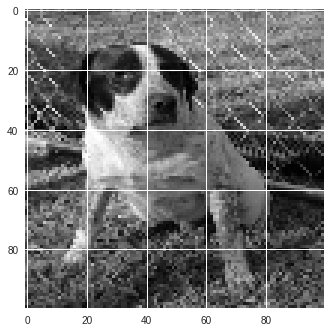

In [7]:
# example
plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.show()  # display!

In [9]:
print(len(training_data))
print(training_data[0][0])
print(training_data[0][0].shape , training_data[0][0].dtype , training_data[0][0].ndim)


599
[[ 94 104  95 ... 122 100 111]
 [102 127 106 ... 153 153 134]
 [ 73  95 104 ... 115 154 143]
 ...
 [ 64  90  82 ...  24 106 104]
 [ 80  96  24 ...  95  92 129]
 [ 32  47  69 ... 115  74  82]]
(100, 100) uint8 2


In [0]:
#Random Shuffling
import random

random.shuffle(training_data)

In [11]:
# X, Y Label split
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(X.shape, X.dtype, X.ndim)
print(len(y))

(599, 100, 100, 1) uint8 4
599


## Save Data as File 





In [0]:
# Save to a file
import pickle

pickle_out = open(DATA_PATH+"M2_1_X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(DATA_PATH+"M2_1_y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


## Load Data from File

In [0]:
import pickle

# Read training file
pickle_in = open(DATA_PATH+"M2_1_X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open(DATA_PATH+"M2_1_y.pickle","rb")
y = pickle.load(pickle_in)
pickle_in.close()

##Import for TensorBoard

In [0]:
from tensorflow.keras.callbacks import TensorBoard     #For TensorBoard

##Set TensorBoard Directory

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

##Run ngrok

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

##Get URL

In [17]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://b60ebd2c.ngrok.io


##TensorBoard Initialization

In [0]:
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,          
                         write_graph=True,   #whether to visualize the graph in TensorBoard.
                         write_grads=True,   #whether to visualize gradient histograms in TensorBoard.  histogram_freq must be greater than 0.
                         write_images=True)  #whether to write model weights to visualize as image in TensorBoard.


##Set train data & test data 8:2

In [19]:
X = X/255.0

TRAIN_RATIO = 0.8

X_train = X[:int(len(X)*TRAIN_RATIO)]
y_train = y[:int(len(y)*TRAIN_RATIO)]

X_test = X[int(len(X)*TRAIN_RATIO):]
y_test = y[int(len(y)*TRAIN_RATIO):]

print(X_train.shape, X_train.dtype, X_train.ndim)
print(len(y_train))

(479, 100, 100, 1) float64 4
479


## Make Model : CNN Prediction

* Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

* MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.3, callbacks=[tbCallBack])

Train on 335 samples, validate on 144 samples
Epoch 1/30
335/335 [==============================] - 37s 112ms/step - loss: 1.6162 - acc: 0.5373 - val_loss: 0.6851 - val_acc: 0.5694
Epoch 2/30
335/335 [==============================] - 28s 85ms/step - loss: 0.6968 - acc: 0.4866 - val_loss: 0.6918 - val_acc: 0.5764
Epoch 3/30
335/335 [==============================] - 28s 82ms/step - loss: 0.6932 - acc: 0.5343 - val_loss: 0.7056 - val_acc: 0.4097
Epoch 4/30
335/335 [==============================] - 28s 82ms/step - loss: 0.6755 - acc: 0.6269 - val_loss: 0.7871 - val_acc: 0.4306
Epoch 5/30
335/335 [==============================] - 30s 91ms/step - loss: 0.6813 - acc: 0.5284 - val_loss: 0.7185 - val_acc: 0.4722
Epoch 6/30
335/335 [==============================] - 27s 81ms/step - loss: 0.6422 - acc: 0.6358 - val_loss: 0.7706 - val_acc: 0.4514
Epoch 7/30
335/335 [==============================] - 27s 82ms/step - loss: 0.6060 - acc: 0.6657 - val_loss: 0.6853 - val_acc: 0.5625
Epoch 8/30
335/

In [21]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7484175125757853
Test accuracy: 0.6166666626930237


## Save the model as file

In [0]:
model.save(DATA_PATH+"256x2-CNN.model")

## Load the model

In [0]:
import tensorflow as tf

model = tf.keras.models.load_model(DATA_PATH+"256x2-CNN.model")

##Prediction

In [24]:
prediction = model.predict_classes(X_test)
print("Prediction", list(prediction[:10].reshape(-1)))
print("True Lable", y_test[:10])

Prediction [1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
True Lable [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


##Retrain


In [25]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.3)

Train on 335 samples, validate on 144 samples
Epoch 1/10
335/335 [==============================] - 2s 6ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.7266 - val_acc: 0.5069
Epoch 2/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.8217 - val_acc: 0.5139
Epoch 3/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.7464 - val_acc: 0.5139
Epoch 4/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.8255 - val_acc: 0.5278
Epoch 5/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.8519 - val_acc: 0.5347
Epoch 6/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.8706 - val_acc: 0.5278
Epoch 7/10
335/335 [==============================] - 1s 4ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.9113 - val_acc: 0.5278
Epoch 8/10
335/335 [==========

In [26]:
prediction = model.predict_classes(X_test)
print("Prediction", list(prediction[:10].reshape(-1)))
print("True Lable", y_test[:10])

Prediction [1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
True Lable [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


## Check Model by outside file

In [73]:
import cv2
#import tensorflow as tf

CATEGORIES = ["Dog", "Cat"] # will use this to convert prediction num to string value



def prepare(filepath):
#   IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.


#model = tf.keras.models.load_model("256x2-CNN.model")  # Load model

predic_data = prepare(DATA_PATH+"dog2.jpg")
prediction = model.predict(predic_data) # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT

print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])


[[0.]]
Dog


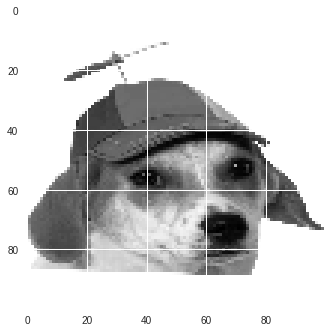

In [74]:
draw_data=np.reshape(predic_data,(IMG_SIZE, IMG_SIZE))
plt.imshow(draw_data, cmap='gray')  # graph it
plt.show()  # display!